In [1]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np
import cv2


2/2 [==============================] - 0s 6ms/step


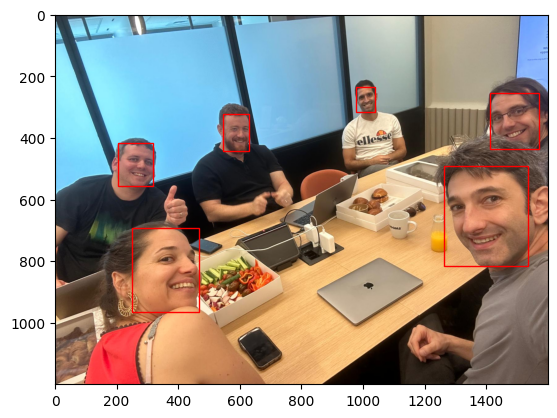

In [2]:

# Load your image
image_path = '/Users/Aviad.Klein/Documents/WhatsApp Image 2023-06-12 at 10.41.20 AM.jpeg'  # Replace with your image path
image = Image.open(image_path)
image = image.convert('RGB')
pixels = np.asarray(image)

# Initialize the MTCNN detector
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(pixels)

# Plot the image
plt.imshow(image)

# Get the context for drawing boxes
ax = plt.gca()

# Plot each box
for face in faces:
    x, y, width, height = face['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

# Display the plot
plt.show()

In [3]:
# Initialize the MTCNN detector
detector = MTCNN()

# Function to draw bounding boxes on the frame
def draw_faces(frame, faces):
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect faces in the frame
    faces = detector.detect_faces(rgb_frame)

    # Draw bounding boxes around detected faces
    draw_faces(frame, faces)

    # Display the frame with bounding boxes
    cv2.imshow('Face Detection', frame)

    # Press 'q' on the keyboard to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 8ms/step


KeyboardInterrupt: 